# DataSets

PyTorch uses DataSets to load data, which is useful for when the data is too large to load in memory all at once. A DataSet is a class that inherits from the `torch.utils.data.Dataset` class. It has two methods: `__len__` and `__getitem__`. The `__len__` method returns the size of the dataset, and the `__getitem__` method returns a sample from the dataset. The `__getitem__` method is used to index the dataset. For example, if `dataset` is an instance of your `FaceLandmarksDataset` class, then `dataset[0]` will return the first sample.

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

For this part, we will load the FashionMNIST dataset in our custom DataSet. 

In [35]:
import pandas as pd
from torch.utils.data import Dataset
import torch
from PIL import Image
import numpy as np
import math


In [49]:
class MyDataset(Dataset):

    def __init__(self, data_file, transform=None, target_transform=None):
        df = pd.read_csv(data_file)
        self.labels = df['label']
        self.width, self.height = int(math.sqrt(df.shape[1]-1)), int(math.sqrt(df.shape[1]-1))
        self.pixels = df.iloc[:, 1:]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.pixels.shape[0]
    
    def __getitem__(self, idx):
        # Since every pixel is stored in a column, we must reshape our image
        # into a n x n array, such that we can generate a PIL image from it.
        arr = self.pixels.iloc[idx].to_numpy().reshape((1, self.width,self.height)).astype(np.uint8)
        image = torch.tensor(arr)
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

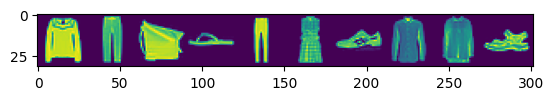

In [53]:
dataset = MyDataset("../datatsets/FashionMNIST/fashion-mnist_test.csv")

from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

dl = DataLoader(dataset, batch_size=10, shuffle=True)
features, labels = next(iter(dl))

grid = make_grid(features, nrow=10)

plt.imshow(grid[0])